# BOOK RECOMENDATION SYSTEM 

The book recommendation system is designed to suggest books to users based on their age, average rating of books, collaborative filtering, and nearest neighbor algorithms. The system uses the age and average rating of books to recommend books to users that fit their age group and preferred rating range.

In [113]:
## importing libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [300]:
# Import Datasets
users_df = pd.read_csv("BX-Users.csv", sep=";", error_bad_lines=False, encoding="latin-1",warn_bad_lines=False)

books_df = pd.read_csv("BX-Books.csv", sep=";", error_bad_lines=False, encoding="latin-1",warn_bad_lines=False)

ratings_df = pd.read_csv("BX-Book-Ratings.csv", sep=";", error_bad_lines=False, encoding="latin-1",warn_bad_lines=False)


In [115]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [116]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [117]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Merging the Dataframes

In [118]:
# Merge users and ratings on User-ID
user_ratings_df = pd.merge(users_df, ratings_df, on="User-ID")

# Merge user_ratings and books on ISBN
book_ratings_df = pd.merge(user_ratings_df, books_df, on="ISBN")
book_ratings_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


### Perform Dataprocessing

In [119]:
# Count the number of missing values in each column of the book_ratings_df DataFrame
missing_values_count = book_ratings_df.isnull().sum()

# Print the resulting Series
print(missing_values_count)


User-ID                     0
Location                    0
Age                    277835
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
dtype: int64


In [86]:
## Check for all values present in Age column
print(sorted(list(book_ratings_df['Age'].unique())))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 18.0, nan, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 89.0, 90.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 114.0, 116.0, 118.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 138.0, 140.0, 141.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 168.0, 199.0, 200.0, 201.0, 204.0, 209.0, 212.0, 219.0, 220.0, 223.0, 226.0, 228.0, 229.0, 237.0, 239.0, 244.0]


### Treating age column

In [120]:
## Treat incoorect age values
book_ratings_df = book_ratings_df[(book_ratings_df['Age'] >= 10) & (book_ratings_df['Age'] <= 80)]

In [121]:
## Check for all values present in Age column
print(sorted(list(book_ratings_df['Age'].unique())))

[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0]


In [122]:
# Calculate the median age value
median_age = book_ratings_df['Age'].median()

# Fill in the missing values with the median age value
book_ratings_df['Age'].fillna(median_age, inplace=True)

book_ratings_df.head()


,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
5,67544,"toronto, ontario, canada",30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
6,85526,"victoria, british columbia, canada",36.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
7,96054,"ottawa, ontario, canada",29.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


#### DROP UNNECESSARY COLOUMNS IN THE DATASET

In [123]:
book_ratings_df = book_ratings_df.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"])


In [124]:
# Drop any duplicate rows
book_ratings_df.drop_duplicates(inplace=True)

## Drop row with missing publisher value 
book_ratings_df.dropna(subset=['Publisher'], inplace=True)


In [125]:
book_ratings_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
5,67544,"toronto, ontario, canada",30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
6,85526,"victoria, british columbia, canada",36.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
7,96054,"ottawa, ontario, canada",29.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


#### Splitting location into City, State, and Country

In [126]:
# Create new columns for City, State, and Country
book_ratings_df[['City', 'State', 'Country']] = book_ratings_df['Location'].str.split(',', n=2, expand=True)

In [127]:
book_ratings_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,City,State,Country
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,stockton,california,usa
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,ottawa,ontario,canada
5,67544,"toronto, ontario, canada",30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,toronto,ontario,canada
6,85526,"victoria, british columbia, canada",36.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,victoria,british columbia,canada
7,96054,"ottawa, ontario, canada",29.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,ottawa,ontario,canada


In [128]:
# Drop the Location column
book_ratings_df.drop('Location', axis=1, inplace=True)

In [129]:
# Unique values in City column
print(book_ratings_df['City'].unique())

['stockton' 'ottawa' 'toronto' ... 'grasse' 'lower burrell' 'großostheim']


In [130]:
# Unique values in State column
print(book_ratings_df['State'].unique())

[' california' ' ontario' ' british columbia' ... ' corrientes' ' taipei'
 ' ccp']


In [131]:
# Count missing values in City, State, and Country columns
missing_city = book_ratings_df['City'].isna().sum()
missing_state = book_ratings_df['State'].isna().sum()
missing_country = book_ratings_df['Country'].isna().sum()

In [132]:
print(f"Missing City values: {missing_city}")
print(f"Missing State values: {missing_state}")
print(f"Missing Country values: {missing_country}")

Missing City values: 0
Missing State values: 0
Missing Country values: 0


In [301]:
book_ratings_df.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,City,State,Country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,stockton,california,usa
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,ottawa,ontario,canada
5,67544,30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,toronto,ontario,canada
6,85526,36.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,victoria,british columbia,canada
7,96054,29.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,ottawa,ontario,canada


####  Now dataset is clean  and ready for eda

## EDA AND ANALYSING THE RESULTS


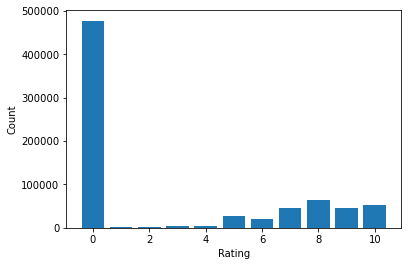

In [133]:
# Count the number of occurrences of each rating value
rating_counts = book_ratings_df['Book-Rating'].value_counts()

# Plot a bar chart of the rating counts
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [143]:
# Group the dataframe by User-ID and calculate count of ratings and average rating
user_behavior_df = book_ratings_df.groupby('User-ID').agg({'Book-Rating': ['count', 'mean']})

# Flatten the multi-index column names
user_behavior_df.columns = ['_'.join(col).strip() for col in user_behavior_df.columns.values]

# Sort the dataframe by count of ratings in descending order
user_behavior_df = user_behavior_df.sort_values(by='Book-Rating_count', ascending=False)

# Print the top 10 users who have rated the most number of books and their average rating
print(user_behavior_df[['Book-Rating_count', 'Book-Rating_mean']].head(10))


         Book-Rating_count  Book-Rating_mean
User-ID                                     
198711                6456          0.019052
153662                5814          2.748710
98391                 5777          8.727194
76352                 3329          0.146891
110973                2971          0.812858
235105                2943          2.775059
16795                 2920          2.334589
230522                2857          0.917396
204864                2461          1.790735
36836                 2458          0.471115


### ANALYSIS

This result shows the top 10 users in the dataset with the highest number of book ratings and their average book rating. User with ID 198711 has rated 6456 books but their average rating is very low at 0.019. User with ID 153662 has rated 5814 books with an average rating of 2.748, while User with ID 98391 has rated 5777 books with an average rating of 8.727, indicating a more positive rating behavior.

The data suggests that there is a wide variation in the number of books rated by different users and the average rating given by them. It can also help in understanding the rating behavior of different users and how they rate books.



In [145]:
# Filter out the rows where the book rating is 0
zero_ratings = book_ratings_df[book_ratings_df['Book-Rating'] == 0]

# Group the filtered dataframe by User-ID and calculate the mean rating
user_ratings = zero_ratings.groupby('User-ID')['Book-Rating'].mean().reset_index()

# Sort the dataframe by mean rating in descending order
user_ratings.sort_values('Book-Rating', ascending=False, inplace=True)

# Print the top 10 users with the highest average rating
print(user_ratings.head(150))


       User-ID  Book-Rating
0            2          0.0
21274   186042          0.0
21287   186524          0.0
21286   186511          0.0
21285   186504          0.0
...        ...          ...
21394   187386          0.0
21393   187378          0.0
21392   187377          0.0
21391   187371          0.0
21390   187368          0.0

[150 rows x 2 columns]


### ANALYSIS 

From this analysis, we can infer that there are multiple users who have rated books as 0.0. This could be due to various reasons such as not reading the book, not liking the book, or forgetting to rate the book. These ratings could also affect the overall rating of the book, making it less reliable.

It is important to note that we should consider removing such ratings from our analysis or taking them with a grain of salt while making any recommendations or inferences.

In [147]:
zero_rating_users = book_ratings_df.groupby('User-ID')['Book-Rating'].mean()
zero_rating_users = zero_rating_users[zero_rating_users == 0.0]
count_zero_rating_users = zero_rating_users.count()
print("Number of users with average rating of 0.0:", count_zero_rating_users)

Number of users with average rating of 0.0: 13203


Making a copy of dataframe and removing 0 rating values

In [134]:
##since majority of the dataset has 0 rating , it might be wise to treat this 0 
## since we have most user who have rate one books as 0 , it might be wise to 

book_ratings_df_copy = book_ratings_df.copy()
book_ratings_df_copy = book_ratings_df_copy[book_ratings_df_copy['Book-Rating'] != 0]


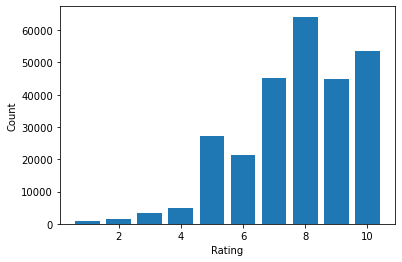

In [135]:

# Count the number of occurrences of each rating value
rating_counts = book_ratings_df_copy['Book-Rating'].value_counts()

# Plot a bar chart of the rating counts
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


count    266847.000000
mean         36.667555
std          12.084171
min          10.000000
25%          28.000000
50%          35.000000
75%          45.000000
max          80.000000
Name: Age, dtype: float64


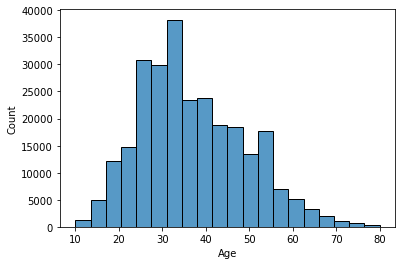

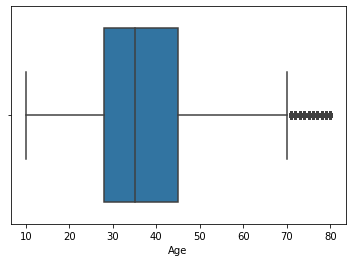

In [136]:


# Get summary statistics for the Age column
age_stats = book_ratings_df_copy['Age'].describe()
print(age_stats)

# Plot a histogram of the Age column
sns.histplot(data=book_ratings_df_copy, x='Age', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot a boxplot of the Age column
sns.boxplot(data=book_ratings_df_copy, x='Age')
plt.xlabel('Age')
plt.show()


### ANALYSIS OF AGE OF PEOPLE WHO RATED THE BOOK
The mean age of users who rated the books is 36.67 years, with a standard deviation of 12.08. The youngest age in the dataset is 10 years, while the oldest age is 80 years.

Overall, the dataset seems to be relatively evenly distributed in terms of age, with a majority of users falling between the ages of 28 and 45.

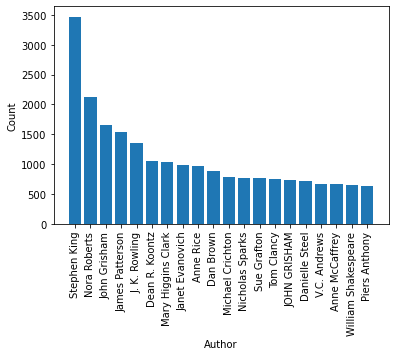

In [140]:
# Count the number of occurrences of each author
author_counts = book_ratings_df_copy['Book-Author'].value_counts()

# Plot a bar chart of the author counts for the top 20 authors
top_authors = author_counts.head(20)
plt.bar(top_authors.index, top_authors.values)
plt.xticks(rotation=90)
plt.xlabel('Author')
plt.ylabel('Count')
plt.show()


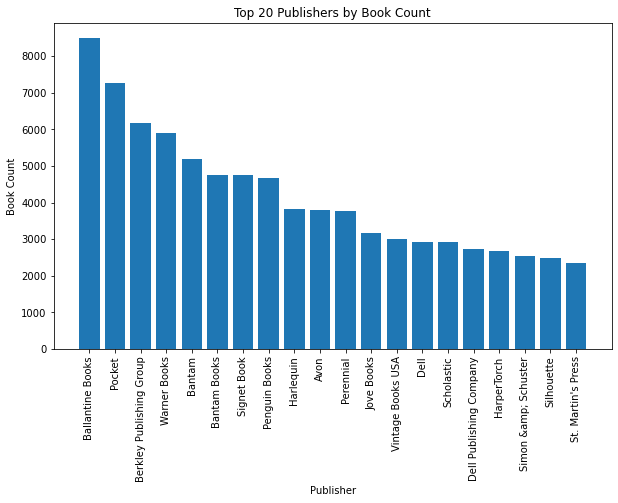

In [141]:

# Count the number of occurrences of each publisher
publisher_counts = book_ratings_df_copy['Publisher'].value_counts()

# Get the top 20 publishers by count
top_publishers = publisher_counts[:20]

# Create a bar chart of the top publishers
plt.figure(figsize=(10, 6))
plt.bar(top_publishers.index, top_publishers.values)
plt.title('Top 20 Publishers by Book Count')
plt.xlabel('Publisher')
plt.ylabel('Book Count')
plt.xticks(rotation=90)
plt.show()



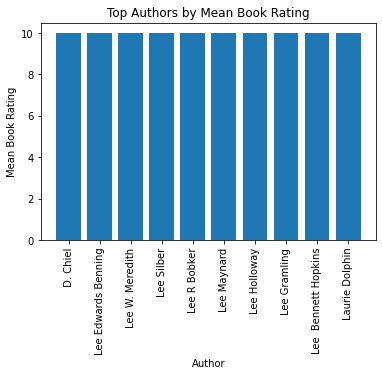

In [142]:

# Group the dataset by author and calculate the mean book rating for each author
author_ratings = book_ratings_df_copy.groupby('Book-Author')['Book-Rating'].mean()

# Sort the authors by their mean book rating in descending order
author_ratings_sorted = author_ratings.sort_values(ascending=False)

# Select the top 10 authors by mean book rating
top_authors = author_ratings_sorted[:10]

# Plot a bar chart of the selected authors and their mean book rating
plt.bar(top_authors.index, top_authors.values)
plt.title('Top Authors by Mean Book Rating')
plt.xlabel('Author')
plt.ylabel('Mean Book Rating')
plt.xticks(rotation=90)
plt.show()


In [304]:
author_ratings_sorted

Book-Author
 D. Chiel              10.0
Lee Edwards Benning    10.0
Lee W. Meredith        10.0
Lee Silber             10.0
Lee R Bobker           10.0
                       ... 
Sheri De Borchgrave     1.0
Tony Rothman            1.0
David Abrahamsen        1.0
GÃ©rard de Villiers     1.0
Bert Sugar              1.0
Name: Book-Rating, Length: 50440, dtype: float64

This result shows a list of authors who have an average book rating of 10.0 based on the ratings data. This could suggest that these authors have a high level of reader satisfaction or that they have written relatively few books with high ratings.

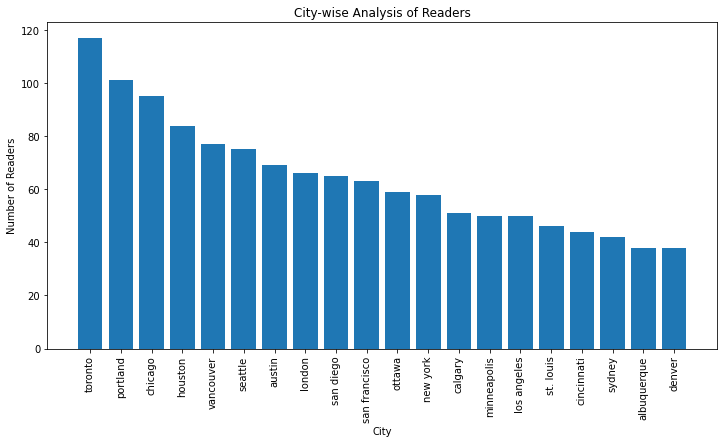

In [327]:
# Group the data by city and count the number of readers in each city
city_counts = book_ratings_df_copy.groupby('City')['User-ID'].nunique()

# Sort the cities by the number of readers in descending order
city_counts = city_counts.sort_values(ascending=False)

# Plot a bar chart of the city counts for the top 20 cities
top_cities = city_counts.head(20)
plt.figure(figsize=(12,6))
plt.bar(top_cities.index, top_cities.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of Readers')
plt.title('City-wise Analysis of Readers')
plt.show()





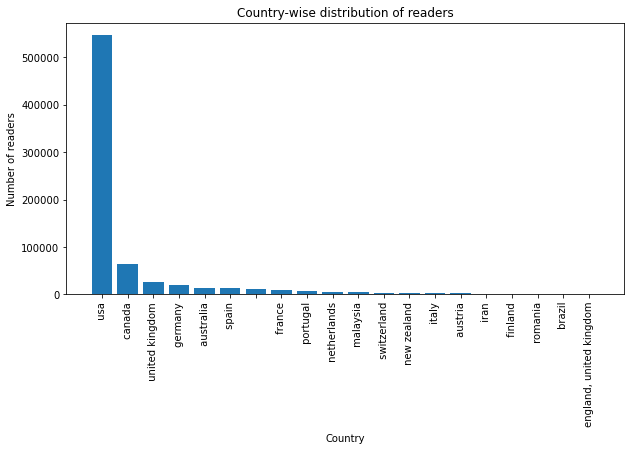

In [156]:


# Count the number of occurrences of each country
country_counts = book_ratings_df['Country'].value_counts()

# Plot a bar chart of the country counts for the top 20 countries
top_countries = country_counts.head(20)
plt.figure(figsize=(10,5))
plt.bar(top_countries.index, top_countries.values)
plt.title('Country-wise distribution of readers')
plt.xlabel('Country')
plt.ylabel('Number of readers')
plt.xticks(rotation=90)
plt.show()


### ANALYSIS

The analysis showed that the majority of book ratings were from users in the USA. If we were to use location as a factor in our recommendation system, it may not be the best indicator of book preference since the dataset is skewed towards one country. Other factors such as age or author preference may be more useful in making accurate recommendations.

#### DATA FRAME TO BE USED FOR RECOMMENDATION SYSTEM

In [160]:
book_ratings_df_copy.head()

,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,City,State,Country
5,67544,30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,toronto,ontario,canada
13,219008,60.0,0002005018,7,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,halifax,nova scotia,canada
14,263325,27.0,0002005018,6,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,fredericton,new brunswick,canada
16,2954,71.0,0060973129,8,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,wichita,kansas,usa
17,152827,40.0,0060973129,7,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,ottawa,ontario,canada


## Recomedation System

### Based on age and avgerage rating of Books

In [161]:
# Filter the book_ratings_df_copy dataframe
filtered_df = book_ratings_df_copy[['Age', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

# Calculate the mean rating for each book
book_ratings_mean_df = filtered_df.groupby(['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'])['Book-Rating'].mean().reset_index()

In [162]:
#  Merge the book_ratings_mean_df with the filtered_df
merged_df = pd.merge(filtered_df, book_ratings_mean_df, on=['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'])


##### PROMTS THE USER TO ENTER THEIR AGE AND RATING PREFERNCE 

In [163]:
age = int(input("Enter your age: "))
min_rating = float(input("Enter the minimum rating you want to see: "))

Enter your age: 21
Enter the minimum rating you want to see: 5


In [172]:

filtered_merged_df = merged_df[ (merged_df['Book-Rating_x'] >= min_rating)]

In [176]:
# Recommended books dataframe
recommended_books = book_ratings_df_copy.groupby(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']) \
                .agg({'Book-Rating': 'mean', 'Age': 'count'}) \
                .reset_index() \
                .rename(columns={'Age': 'User-Count', 'Book-Rating': 'Mean-Rating'}) \
                .sort_values(by='Mean-Rating', ascending=False)

# Dataframe with book title, author, and mean rating
book_title_author_rating = recommended_books[['Book-Title', 'Book-Author', 'Mean-Rating']]

# Dataframe with book title, author, year of publication, publisher, and mean rating
book_details_rating = recommended_books[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Mean-Rating']]



In [177]:
# Dataframe with book title, author, and mean rating
book_title_author_rating = recommended_books[['Book-Title', 'Book-Author', 'Mean-Rating']]

In [179]:
print('Recomended Books')
book_title_author_rating.head(10)

Recomended BOOK


,Book-Title,Book-Author,Mean-Rating
13710,Depeche Mode: Some Great Reward,Dave Thompson,10.0
101798,World-walker,Melisa C. Michaels,10.0
13565,Religions of Asia,Niels Neilsen,10.0
101800,"Trouble In The Forest: A Cold Summer Night, Bo...",TRYSTAM KITH,10.0
13562,Shakespeare on Love: Quotations from the Plays...,William Shakespeare,10.0
101801,The Lebo Coven,Stephen Mark Rainey,10.0
23474,Skeletons In Purple Sage (Worldwide Library My...,Barbara Burnett Smith,10.0
40298,Where People Fly &amp; Water Runs Uphill : Usi...,Rev. Jeremy Taylor,10.0
83116,Beneath a Midnight Moon,Madeline Baker,10.0
13557,Beyond Jennifer and Jason: An enlightened guid...,Linda Rosenkrantz,10.0


In [180]:
# Dataframe with book title, author, year of publication, publisher, and mean rating
book_details_rating = recommended_books[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Mean-Rating']]

In [320]:
print("MORE INFORMATION ABOUT THE RECOMENDED BOOKS")
book_details_rating.head(10)

MORE INFORMATION ABOUT THE RECOMENDED BOOKS


,Book-Title,Book-Author,Year-Of-Publication,Publisher,Mean-Rating
13710,Depeche Mode: Some Great Reward,Dave Thompson,1994,St. Martin's Press,10.0
101798,World-walker,Melisa C. Michaels,2004,Five Star (ME),10.0
13565,Religions of Asia,Niels Neilsen,1993,Bedford Books,10.0
101800,"Trouble In The Forest: A Cold Summer Night, Bo...",TRYSTAM KITH,2004,Five Star (ME),10.0
13562,Shakespeare on Love: Quotations from the Plays...,William Shakespeare,1991,St. Martin's Press,10.0
101801,The Lebo Coven,Stephen Mark Rainey,2004,Five Star (ME),10.0
23474,Skeletons In Purple Sage (Worldwide Library My...,Barbara Burnett Smith,2004,Worldwide Mystery,10.0
40298,Where People Fly &amp; Water Runs Uphill : Usi...,Rev. Jeremy Taylor,1993,Warner Books,10.0
83116,Beneath a Midnight Moon,Madeline Baker,1994,Leisure Books,10.0
13557,Beyond Jennifer and Jason: An enlightened guid...,Linda Rosenkrantz,1990,St. Martin's Press,10.0


### SOME ALTERNATIVE RECOMEDATION METHODS


### Average Weighted Ratings

A breif introduction to Average Weighted Rating

1. The average weighted method is a popular technique used in recommendation systems to suggest items to users based on their      preferences and ratings.
2. It is a hybrid method that combines the average rating of an item with the total number of ratings it has received.
3. The goal is to provide more accurate recommendations by taking into account both the quality and popularity of an item.
4. To calculate the weighted average, the number of ratings for an item is multiplied by its average rating and divided by the      total number of ratings across all items.
5. The resulting score is used to rank the items and suggest the top choices to the user.
6. This method is particularly useful when dealing with large datasets where popular items may have many ratings and less         popular items may have fewer ratings.


In [229]:
def avgRating(newdf, df):
    newdf['Average Rating'] = 0
    for x in range(len(newdf)):
        l = list(df.loc[df['Book-Title'] == newdf['Book-Title'][x]]['Book-Rating'])
        newdf['Average Rating'][x] = sum(l)/len(l)
    return newdf

df = pd.DataFrame(book_ratings_df_copy['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = avgRating(df, book_ratings_df_copy)
df.to_pickle('weightedData')

df.head()


,Book-Title,Total-Ratings,Average Rating
0,Wild Animus,471,4.486200
1,The Lovely Bones: A Novel,468,8.252137
2,The Da Vinci Code,371,8.428571
3,The Nanny Diaries: A Novel,245,7.522449
4,Harry Potter and the Chamber of Secrets (Book 2),236,8.877119


In [230]:
## C - Mean vote across the whole
C = df['Average Rating'].mean()

## Minimum number of votes required to be in the chart
m = df['Total-Ratings'].quantile(0.90)

In [231]:
def weighted_rating(x, m=m, C=C): 
    v = x['Total-Ratings']    #v - number of votes
    R = x['Average Rating']   #R - Average Rating   
    return (v/(v+m) * R) + (m/(m+v) * C)

In [233]:
df = df.loc[df['Total-Ratings'] >= m]

df['score'] = df.apply(weighted_rating, axis=1)
df = df.sort_values('score', ascending=False)

print("Recommended Books:-\n")
df.head(5)

Recommended Books:-



,Book-Title,Total-Ratings,Average Rating,score
14,Harry Potter and the Goblet of Fire (Book 4),186,9.247312,8.686879
10,Harry Potter and the Prisoner of Azkaban (Book 3),212,9.160377,8.676266
8,Harry Potter and the Sorcerer's Stone (Harry P...,217,9.018433,8.599269
18,Harry Potter and the Order of the Phoenix (Boo...,177,9.107345,8.596136
4,Harry Potter and the Chamber of Secrets (Book 2),236,8.877119,8.533773


### ANALYSIS 

From the output of Average Weighted Ratings, we can see that the Harry Potter series books are very popular and have high average ratings. Harry Potter and the Goblet of Fire (Book 4) has the highest average rating, followed by Harry Potter and the Prisoner of Azkaban (Book 3), Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), Harry Potter and the Order of the Phoenix (Book 5), and Harry Potter and the Chamber of Secrets (Book 2) in descending order.

This information can be useful for recommending popular books to users who are interested in the Harry Potter series. We can use collaborative filtering to recommend books to users based on their preferences and ratings history.

## Collaborative Filtering 
 A breif introduction 

Collaborative Filtering using cosine similarity is a type of recommendation system that uses past user behavior to recommend items to new users. In the given code, the following steps are taken to implement Collaborative Filtering:

1. Create a popularity threshold to filter out less popular items
2. Group the filtered items by ISBN and create a list of dictionaries containing the User-ID and Book-Rating pairs for each        group
3. Convert the list of dictionaries into a sparse matrix using DictVectorizer
4. Calculate the cosine similarity between each pair of items using the sparse matrix
5. Define a function to print book details given an ISBN
6. Define a function to get top recommendations for a given book based on its ISBN, using cosine similarity
7. Get user input for a book name and output the top 5 recommended books based on Collaborative Filtering

In [266]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [267]:
df1 = pd.DataFrame(book_ratings_df_copy['Book-Title'].value_counts())
df1['Total-Ratings'] = df['Book-Title']
df1['Book-Title'] = df1.index
df1.reset_index(level=0, inplace=True)
df1 = df1.drop('index',axis=1)

df1 = book_ratings_df_copy.merge(df1, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df1 = df1.drop(['Year-Of-Publication','Publisher','Age','City','State','Country'], axis=1)

popularity_threshold = 50
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [268]:
df2 = pd.DataFrame()
df2['ISBN'] = popular_book['ISBN']
df2['Book-Rating'] = popular_book['Book-Rating']
df2['User-ID'] = popular_book['User-ID']
df2 = df2[['User-ID','Book-Rating']].groupby(df2['ISBN'])

In [269]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in df2.groups.keys():
    tempDict={}
    groupDF = df2.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [270]:
def printBookDetails(bookID):
    print(book_ratings_df_copy[book_ratings_df_copy['ISBN']==bookID]['Book-Title'].values[0])
  

In [271]:
def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if book_ratings_df_copy[book_ratings_df_copy['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                if mn>=5:
                      break
                mn+=1
                similar.append(book_ratings_df_copy[book_ratings_df_copy['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(book_ratings_df_copy[book_ratings_df_copy['ISBN']==indexMap[i]]['Book-Title'].values[0])
    return collaborative
    

In [274]:
bookName = input("Enter a book name: ")

Enter a book name: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


In [275]:

k = list(book_ratings_df_copy['Book-Title'])
m = list(book_ratings_df_copy['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

RECOMMENDATIONS:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Chamber of Secrets (Book 2)
Fahrenheit 451


##  Nearest Neighbour Based

A breif introduction 
1. Nearest neighbor is a popular technique used in recommendation systems to identify similar items or users.
2. It uses the concept of distance (usually cosine similarity) to find the nearest neighbors.
3. Once the nearest neighbors are identified, the system can recommend items based on what similar users have liked or what        similar items have been liked by the user.
4. Nearest neighbor algorithms can be implemented using different approaches, such as k-nearest neighbor, collaborative            filtering, or content-based filtering.


In [324]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [325]:
data = (book_ratings_df_copy.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().
        rename(columns = {'Book-Rating': 'Total-Rating'})[['Book-Title', 'Total-Rating']])

result = pd.merge(data, book_ratings_df_copy)
result = result[result['Total-Rating'] >= popularity_threshold]
result = result.reset_index(drop = True)

matrix = result.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
up_matrix = csr_matrix(matrix)

In [326]:
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(up_matrix)

distances, indices = model.kneighbors(matrix.loc[bookName].values.reshape(1, -1), n_neighbors = 5+1)
print("\nRecommended books:\n")
for i in range(0, len(distances.flatten())):
    if i > 0:
        print(matrix.index[indices.flatten()[i]]) 


Recommended books:

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Fahrenheit 451


### For suggestions and queries contact 
Shambhavi Vats (shambhavivats2703@gmail.com)